In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.cross_validation import cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error;

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
Stocks = pd.read_csv('Data/DS_Final_Project_Data.csv')

### Data Cleaning
#### Our first task is to "clean" our dataset.  To do this, we will:
- Eliminate 2014 datapoints - we decided to use only three years of data
- Typically, we would remove commas, $-signs, blank spaces/"white space", and other unnecessary characters.  However, our imported data (.csv) file proved quite "clean" of these impurities from the start
- Remove Nan's, NA's, etc.

In [3]:
# Eliminate 2014 datapoints
Stocks1 = Stocks.drop(columns=['SPX_14', 'Px_14', 'Rev_14', 'GP_14', 'EBITDA_14', 'OP_14', 'EPS_14', 'aEPS_14', 'CFO_14', 
                     'FCF_14', 'ROIC_14', 'ROE_14', 'PE_14', 'PCFO_14', 'PCFO_15', 'PCFO_16', 'PCFO_17', 'PS_14']);

In [4]:
Stocks1.head()

,TKR,Company,Sector,Industry,SPX_15,SPX_16,SPX_17,Px_15,Px_16,Px_17,...,ROIC_17,ROE_15,ROE_16,ROE_17,PE_15,PE_16,PE_17,PS_15,PS_16,PS_17
0,BA,Boeing Company,Industrials,Aerospace & Defense,2043.94,2238.83,2673.61,144.59,155.68,294.91,...,79.83,68.96,136.80,1397.78,17.54,21.94,29.14,1.01,1.02,1.90
1,APTV,Aptiv PLC,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,71.81,56.41,84.83,...,14.81,49.92,35.86,35.82,16.47,11.13,17.93,1.59,1.11,1.77
2,LEA,Lear Corporation,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,122.83,132.37,176.66,...,23.30,25.33,32.59,35.74,11.70,9.67,10.46,0.51,0.50,0.59
3,BWA,BorgWarner Inc.,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,43.23,39.44,51.09,...,7.94,17.01,3.50,12.69,14.51,12.11,13.38,1.23,0.92,1.11
4,ALV,Autoliv Inc.,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,89.88,81.51,91.54,...,8.25,13.27,15.90,11.08,20.07,16.65,20.25,1.21,0.98,1.07


In [5]:
# Drop all "NaN", "NA", and/or other null data
Stocks2 = Stocks1.dropna()

In [6]:
Stocks2.head()

,TKR,Company,Sector,Industry,SPX_15,SPX_16,SPX_17,Px_15,Px_16,Px_17,...,ROIC_17,ROE_15,ROE_16,ROE_17,PE_15,PE_16,PE_17,PS_15,PS_16,PS_17
0,BA,Boeing Company,Industrials,Aerospace & Defense,2043.94,2238.83,2673.61,144.59,155.68,294.91,...,79.83,68.96,136.80,1397.78,17.54,21.94,29.14,1.01,1.02,1.90
1,APTV,Aptiv PLC,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,71.81,56.41,84.83,...,14.81,49.92,35.86,35.82,16.47,11.13,17.93,1.59,1.11,1.77
2,LEA,Lear Corporation,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,122.83,132.37,176.66,...,23.30,25.33,32.59,35.74,11.70,9.67,10.46,0.51,0.50,0.59
3,BWA,BorgWarner Inc.,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,43.23,39.44,51.09,...,7.94,17.01,3.50,12.69,14.51,12.11,13.38,1.23,0.92,1.11
4,ALV,Autoliv Inc.,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,89.88,81.51,91.54,...,8.25,13.27,15.90,11.08,20.07,16.65,20.25,1.21,0.98,1.07


In [7]:
Stocks2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 2047
Data columns (total 46 columns):
TKR          1016 non-null object
Company      1016 non-null object
Sector       1016 non-null object
Industry     1016 non-null object
SPX_15       1016 non-null float64
SPX_16       1016 non-null float64
SPX_17       1016 non-null float64
Px_15        1016 non-null float64
Px_16        1016 non-null float64
Px_17        1016 non-null float64
Rev_15       1016 non-null float64
Rev_16       1016 non-null float64
Rev_17       1016 non-null float64
GP_15        1016 non-null float64
GP_16        1016 non-null float64
GP_17        1016 non-null float64
EBITDA_15    1016 non-null float64
EBITDA_16    1016 non-null float64
EBITDA_17    1016 non-null float64
OP_15        1016 non-null float64
OP_16        1016 non-null float64
OP_17        1016 non-null float64
EPS_15       1016 non-null float64
EPS_16       1016 non-null float64
EPS_17       1016 non-null float64
aEPS_15      1016 non-

### Feature Engineering
#### Our next task is to conduct "feature engineering", where we will create new features from mathematical operations executed on original features from our dataset (.csv file) 
- Price changes (price returns) - for the 1- and 2-year periods for both the S&P 500 ("SPX_xx") and individual stocks ("Px_xx")
- Relative price changes (relative price returns) - the difference between individual stocks' price changes and the S&P 500's price change for both the 1- and 2-year periods
    - Relative price change is our MODEL'S TARGET FEATURE
- Revenue, profit/EPS, and cash flow growth rates (from the 2016-17 (1-year) and 2015-17 (2-year) periods)
    - Revenue (Rev_xx)
    - Gross profit (GP_xx)
    - EBITDA (EBITDA_xx; earnings before interest, taxes, depreciation and amortization)
    - Operating profit (OP_xx)
    - EPS (EPS_xx; earnings per share)
    - Adjusted EPS (aEPS_xx; removes "non-recurring items" from EPS)
    - Cash flow from Operations (CFO_xx)
    - Free Cash flow (FCF_xx; CFO less capital expenditures)
- Profitability expansion (for the 2016-17 (1-year) and 2015-17 (2-year) periods)
    - Gross margin (gross profit divided by revenue)
    - Operating margin (operating profit divided by revenue)
    - Return on Invested Capital (ROIC_xx; net operating profit divided by invested capital (debt+equity))
    - Return on Equity (ROE_xx; net income divided by equity)

In [8]:
# I noticed there were several "warnings" banners following coding, particularly with respect to feature engineering 
# and visualization graphics of thoses engineered features.  So we will turn off these warnings.
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Generate 1- and 2-year price change data for both the S&P 500 and all stocks in our dataset 
Stocks2['SPX_1516'] = Stocks2.SPX_16 / Stocks2.SPX_15 - 1
Stocks2['SPX_1617'] = Stocks2.SPX_17 / Stocks2.SPX_16 - 1
Stocks2['SPX_1517'] = Stocks2.SPX_17 / Stocks2.SPX_15 - 1
Stocks2['Px_1516'] = Stocks2.Px_16 / Stocks2.Px_15 - 1
Stocks2['Px_1617'] = Stocks2.Px_17 / Stocks2.Px_16 - 1
Stocks2['Px_1517'] = Stocks2.Px_17 / Stocks2.Px_15 - 1

# Generate 1- and 2-year RELATIVE PERFORMANCE data for all stocks in our dataset ("Rel_Perf" = Px_XX - SPX_XX)
# => Rel_Perf_XXXX IS OUR TARGET VARIABLE !!!
Stocks2['Rel_Perf_1516'] = Stocks2.Px_1516 - Stocks2.SPX_1516
Stocks2['Rel_Perf_1617'] = Stocks2.Px_1617 - Stocks2.SPX_1617
Stocks2['Rel_Perf_1517'] = Stocks2.Px_1517 - Stocks2.SPX_1517

In [10]:
# Generate revenue, income/EPS, and cash flow growth rate features for both the 1- and 2-year periods
Stocks2['Rev_1617'] = Stocks2.Rev_17 / Stocks2.Rev_16 - 1
Stocks2['Rev_1517'] = Stocks2.Rev_17 / Stocks2.Rev_15 - 1
Stocks2['GP_1617'] = Stocks2.GP_17 / Stocks2.GP_16 - 1
Stocks2['GP_1517'] = Stocks2.GP_17 / Stocks2.GP_15 - 1
Stocks2['EBITDA_1617'] = Stocks2.EBITDA_17 / Stocks2.EBITDA_16 - 1
Stocks2['EBITDA_1517'] = Stocks2.EBITDA_17 / Stocks2.EBITDA_15 - 1
Stocks2['OP_1617'] = Stocks2.OP_17 / Stocks2.OP_16 - 1
Stocks2['OP_1517'] = Stocks2.OP_17 / Stocks2.OP_15 - 1
Stocks2['EPS_1617'] = Stocks2.EPS_17 / Stocks2.EPS_16 - 1
Stocks2['EPS_1517'] = Stocks2.EPS_17 / Stocks2.EPS_15 - 1
Stocks2['aEPS_1617'] = Stocks2.aEPS_17 / Stocks2.aEPS_16 - 1
Stocks2['aEPS_1517'] = Stocks2.aEPS_17 / Stocks2.aEPS_15 - 1
Stocks2['CFO_1617'] = Stocks2.CFO_17 / Stocks2.CFO_16 - 1
Stocks2['CFO_1517'] = Stocks2.CFO_17 / Stocks2.CFO_15 - 1
Stocks2['FCF_1617'] = Stocks2.FCF_17 / Stocks2.FCF_16 - 1
Stocks2['FCF_1517'] = Stocks2.FCF_17 / Stocks2.FCF_15 - 1

In [11]:
# Generate profitability expansion (growth rates) features for both the 1- and 2-year periods

# Interim step: calculate companies' gross margin and operating profit margins for all periods
Stocks2['GM_15'] = Stocks2.GP_15 / Stocks2.Rev_15
Stocks2['GM_16'] = Stocks2.GP_16 / Stocks2.Rev_16
Stocks2['GM_17'] = Stocks2.GP_17 / Stocks2.Rev_17
Stocks2['OPM_15'] = Stocks2.OP_15 / Stocks2.Rev_15
Stocks2['OPM_16'] = Stocks2.OP_16 / Stocks2.Rev_16
Stocks2['OPM_17'] = Stocks2.OP_17 / Stocks2.Rev_17

# Profitability expansion (growth rates) features are calculated here 
Stocks2['GMX_1617'] = Stocks2.GM_17 - Stocks2.GM_16
Stocks2['GMX_1517'] = Stocks2.GM_17 - Stocks2.GM_15
Stocks2['OMX_1617'] = Stocks2.OPM_17 - Stocks2.OPM_16
Stocks2['OMX_1517'] = Stocks2.OPM_17 - Stocks2.OPM_15
Stocks2['ROIX_1516'] = Stocks2.ROIC_16 - Stocks2.ROIC_15
Stocks2['ROIX_1617'] = Stocks2.ROIC_17 - Stocks2.ROIC_16
Stocks2['ROIX_1517'] = Stocks2.ROIC_17 - Stocks2.ROIC_15
Stocks2['ROEX_1516'] = Stocks2.ROE_16 - Stocks2.ROE_15
Stocks2['ROEX_1617'] = Stocks2.ROE_17 - Stocks2.ROE_16
Stocks2['ROEX_1517'] = Stocks2.ROE_17 - Stocks2.ROE_15

In [12]:
# Generate valuation expansion features for both the 1- and 2-year periods
Stocks2['PEX_1516'] = Stocks2.PE_16 / Stocks2.PE_15 - 1
Stocks2['PEX_1617'] = Stocks2.PE_17 / Stocks2.PE_16 - 1
Stocks2['PEX_1517'] = Stocks2.PE_17 / Stocks2.PE_15 - 1
Stocks2['PSX_1516'] = Stocks2.PS_16 / Stocks2.PS_15 - 1
Stocks2['PSX_1617'] = Stocks2.PS_17 / Stocks2.PS_16 - 1
Stocks2['PSX_1517'] = Stocks2.PS_17 / Stocks2.PS_15 - 1

In [13]:
Stocks2.head()

,TKR,Company,Sector,Industry,SPX_15,SPX_16,SPX_17,Px_15,Px_16,Px_17,...,ROIX_1517,ROEX_1516,ROEX_1617,ROEX_1517,PEX_1516,PEX_1617,PEX_1517,PSX_1516,PSX_1617,PSX_1517
0,BA,Boeing Company,Industrials,Aerospace & Defense,2043.94,2238.83,2673.61,144.59,155.68,294.91,...,47.37,67.84,1260.98,1328.82,0.250855,0.328168,0.661345,0.009901,0.862745,0.881188
1,APTV,Aptiv PLC,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,71.81,56.41,84.83,...,-6.58,-14.06,-0.04,-14.10,-0.324226,0.610961,0.088646,-0.301887,0.594595,0.113208
2,LEA,Lear Corporation,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,122.83,132.37,176.66,...,7.26,7.26,3.15,10.41,-0.173504,0.081696,-0.105983,-0.019608,0.180000,0.156863
3,BWA,BorgWarner Inc.,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,43.23,39.44,51.09,...,-4.26,-13.51,9.19,-4.32,-0.165403,0.104872,-0.077877,-0.252033,0.206522,-0.097561
4,ALV,Autoliv Inc.,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,89.88,81.51,91.54,...,-0.98,2.63,-4.82,-2.19,-0.170404,0.216216,0.008969,-0.190083,0.091837,-0.115702


#### Our feature engineering work is complete - we will now commence our predictive modeling efforts
- We will divide our analysis into individual 1-year (2016-17) and 2-year (2015-17) modeling blocks
- We will first create two new dataframes - one each for the 1-year and 2-year assessment.  These new dataframes will include only our engineered independent features and target variable(s) 

#### 2016-2017 (1-year) Stock Performance Analysis - as Driven by 2016-2017 Financial Performance

In [14]:
Stocks3 = Stocks2[['TKR', 'Company', 'Sector', 'Industry', 'Px_1516', 'Px_1617', 'Rel_Perf_1617', 'ROIC_16', 'ROE_16', 
                   'PE_16', 'PS_16', 'Rev_1617', 'GP_1617', 'EBITDA_1617', 'OP_1617', 'aEPS_1617', 'CFO_1617', 'ROIX_1516', 
                   'ROIX_1617', 'ROEX_1516', 'ROEX_1617', 'PEX_1516', 'PEX_1617', 'PSX_1516', 'PSX_1617']]

In [15]:
Stocks3.head()

,TKR,Company,Sector,Industry,Px_1516,Px_1617,Rel_Perf_1617,ROIC_16,ROE_16,PE_16,...,aEPS_1617,CFO_1617,ROIX_1516,ROIX_1617,ROEX_1516,ROEX_1617,PEX_1516,PEX_1617,PSX_1516,PSX_1617
0,BA,Boeing Company,Industrials,Aerospace & Defense,0.076700,0.894335,0.700135,38.44,136.80,21.94,...,0.662983,0.270978,5.98,41.39,67.84,1260.98,0.250855,0.328168,0.009901,0.862745
1,APTV,Aptiv PLC,Consumer Discretionary,Auto Components,-0.214455,0.503811,0.309612,13.28,35.86,11.13,...,-0.117871,0.347759,-8.11,1.53,-14.06,-0.04,-0.324226,0.610961,-0.301887,0.594595
2,LEA,Lear Corporation,Consumer Discretionary,Auto Components,0.077668,0.334592,0.140393,19.87,32.59,9.67,...,0.211689,0.101155,3.83,3.43,7.26,3.15,-0.173504,0.081696,-0.019608,0.180000
3,BWA,BorgWarner Inc.,Consumer Discretionary,Auto Components,-0.087671,0.295385,0.101186,2.17,3.50,12.11,...,0.189602,0.139616,-10.03,5.77,-13.51,9.19,-0.165403,0.104872,-0.252033,0.206522
4,ALV,Autoliv Inc.,Consumer Discretionary,Auto Components,-0.093124,0.123052,-0.071147,11.39,15.90,16.65,...,-0.024691,0.077729,2.16,-3.14,2.63,-4.82,-0.170404,0.216216,-0.190083,0.091837


In [16]:
Stocks_1617 = Stocks3.dropna()

In [17]:
Stocks_1617.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 0 to 2047
Data columns (total 25 columns):
TKR              1015 non-null object
Company          1015 non-null object
Sector           1015 non-null object
Industry         1015 non-null object
Px_1516          1015 non-null float64
Px_1617          1015 non-null float64
Rel_Perf_1617    1015 non-null float64
ROIC_16          1015 non-null float64
ROE_16           1015 non-null float64
PE_16            1015 non-null float64
PS_16            1015 non-null float64
Rev_1617         1015 non-null float64
GP_1617          1015 non-null float64
EBITDA_1617      1015 non-null float64
OP_1617          1015 non-null float64
aEPS_1617        1015 non-null float64
CFO_1617         1015 non-null float64
ROIX_1516        1015 non-null float64
ROIX_1617        1015 non-null float64
ROEX_1516        1015 non-null float64
ROEX_1617        1015 non-null float64
PEX_1516         1015 non-null float64
PEX_1617         1015 non-null float64


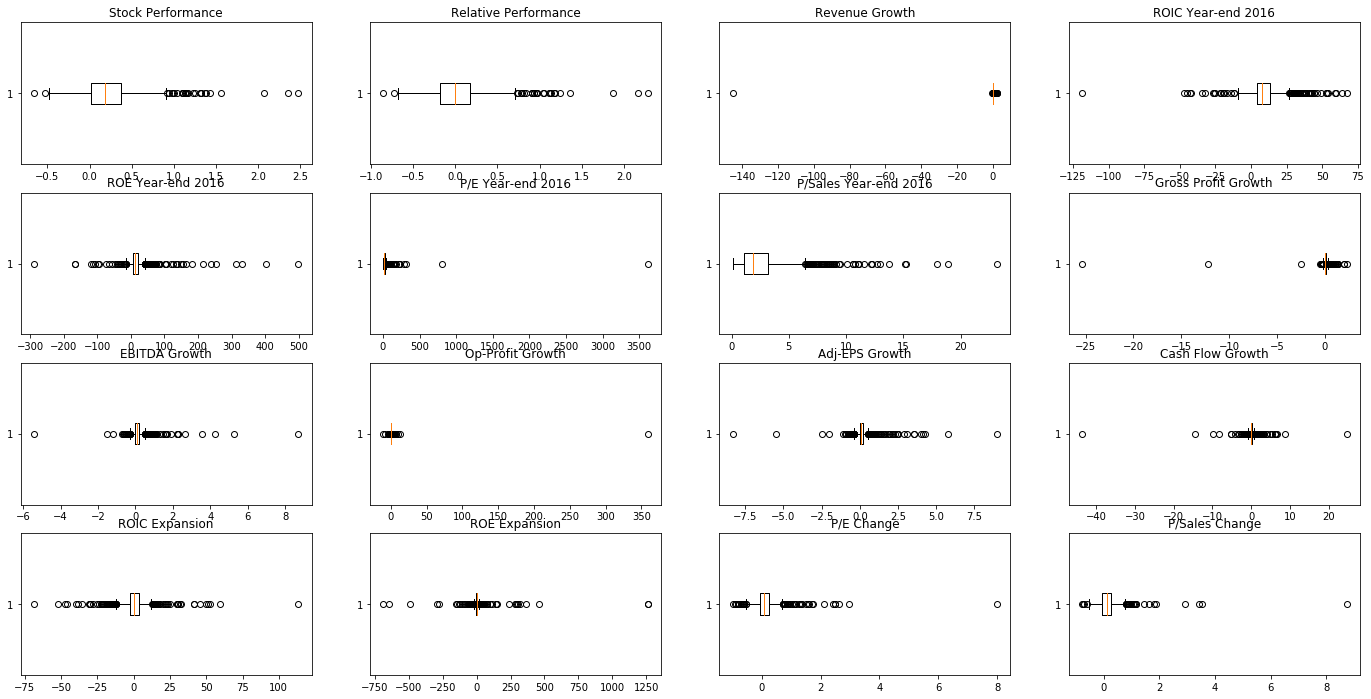

In [18]:
fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(4,4,1)
ax2 = fig.add_subplot(4,4,2)
ax3 = fig.add_subplot(4,4,3)
ax4 = fig.add_subplot(4,4,4)
ax5 = fig.add_subplot(4,4,5)
ax6 = fig.add_subplot(4,4,6)
ax7 = fig.add_subplot(4,4,7)
ax8 = fig.add_subplot(4,4,8)
ax9 = fig.add_subplot(4,4,9)
ax10 = fig.add_subplot(4,4,10)
ax11 = fig.add_subplot(4,4,11)
ax12 = fig.add_subplot(4,4,12)
ax13 = fig.add_subplot(4,4,13)
ax14 = fig.add_subplot(4,4,14)
ax15 = fig.add_subplot(4,4,15)
ax16 = fig.add_subplot(4,4,16)
ax1.boxplot(Stocks_1617.Px_1617, vert=False), ax1.set_title('Stock Performance')
ax2.boxplot(Stocks_1617.Rel_Perf_1617, vert=False), ax2.set_title('Relative Performance')
ax3.boxplot(Stocks_1617.Rev_1617, vert=False), ax3.set_title('Revenue Growth')
ax4.boxplot(Stocks_1617.ROIC_16, vert=False), ax4.set_title('ROIC Year-end 2016')
ax5.boxplot(Stocks_1617.ROE_16, vert=False), ax5.set_title('ROE Year-end 2016')
ax6.boxplot(Stocks_1617.PE_16, vert=False), ax6.set_title('P/E Year-end 2016')
ax7.boxplot(Stocks_1617.PS_16, vert=False), ax7.set_title('P/Sales Year-end 2016')
ax8.boxplot(Stocks_1617.GP_1617, vert=False), ax8.set_title('Gross Profit Growth')
ax9.boxplot(Stocks_1617.EBITDA_1617, vert=False), ax9.set_title('EBITDA Growth')
ax10.boxplot(Stocks_1617.OP_1617, vert=False), ax10.set_title('Op-Profit Growth')
ax11.boxplot(Stocks_1617.aEPS_1617, vert=False), ax11.set_title('Adj-EPS Growth')
ax12.boxplot(Stocks_1617.CFO_1617, vert=False), ax12.set_title('Cash Flow Growth')
ax13.boxplot(Stocks_1617.ROIX_1617, vert=False), ax13.set_title('ROIC Expansion')
ax14.boxplot(Stocks_1617.ROEX_1617, vert=False), ax14.set_title('ROE Expansion')
ax15.boxplot(Stocks_1617.PEX_1617, vert=False), ax15.set_title('P/E Change')
ax16.boxplot(Stocks_1617.PSX_1617, vert=False), ax16.set_title('P/Sales Change');

In [19]:
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.Px_1617-Stocks_1617.Px_1617.mean())<=(1*Stocks_1617.Px_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.Rel_Perf_1617-Stocks_1617.Rel_Perf_1617.mean())<=(1*Stocks_1617.Rel_Perf_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.Rev_1617-Stocks_1617.Rev_1617.mean())<=(1*Stocks_1617.Rev_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.ROIC_16-Stocks_1617.ROIC_16.mean())<=(1*Stocks_1617.ROIC_16.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.ROE_16-Stocks_1617.ROE_16.mean())<=(1*Stocks_1617.ROE_16.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.PE_16-Stocks_1617.PE_16.mean())<=(1*Stocks_1617.PE_16.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.PS_16-Stocks_1617.PS_16.mean())<=(1*Stocks_1617.PS_16.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.GP_1617-Stocks_1617.GP_1617.mean())<=(1*Stocks_1617.GP_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.EBITDA_1617-Stocks_1617.EBITDA_1617.mean())<=(1*Stocks_1617.EBITDA_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.OP_1617-Stocks_1617.OP_1617.mean())<=(1*Stocks_1617.OP_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.aEPS_1617-Stocks_1617.aEPS_1617.mean())<=(1*Stocks_1617.aEPS_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.CFO_1617-Stocks_1617.CFO_1617.mean())<=(1*Stocks_1617.CFO_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.ROIX_1617-Stocks_1617.ROIX_1617.mean())<=(1*Stocks_1617.ROIX_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.ROEX_1617-Stocks_1617.ROEX_1617.mean())<=(1*Stocks_1617.ROEX_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.PEX_1617-Stocks_1617.PEX_1617.mean())<=(1*Stocks_1617.PEX_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.PSX_1617-Stocks_1617.PSX_1617.mean())<=(1*Stocks_1617.PSX_1617.std())];

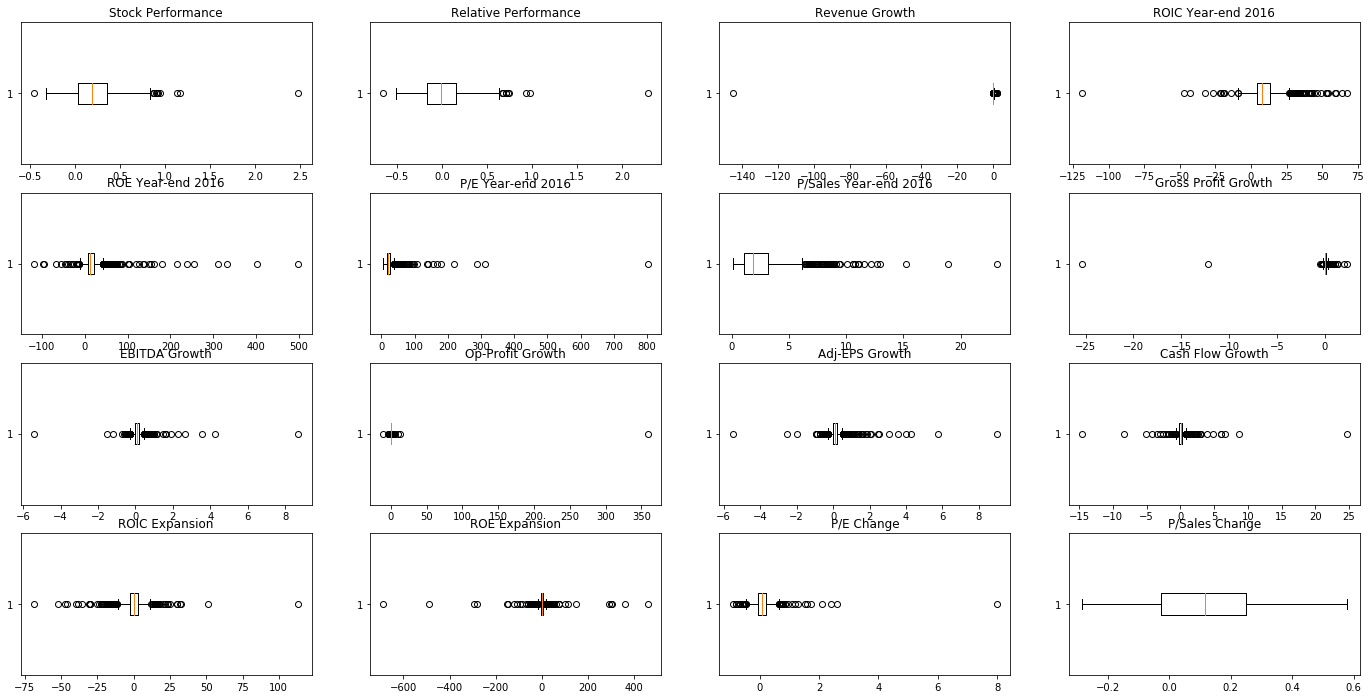

In [20]:
fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(4,4,1)
ax2 = fig.add_subplot(4,4,2)
ax3 = fig.add_subplot(4,4,3)
ax4 = fig.add_subplot(4,4,4)
ax5 = fig.add_subplot(4,4,5)
ax6 = fig.add_subplot(4,4,6)
ax7 = fig.add_subplot(4,4,7)
ax8 = fig.add_subplot(4,4,8)
ax9 = fig.add_subplot(4,4,9)
ax10 = fig.add_subplot(4,4,10)
ax11 = fig.add_subplot(4,4,11)
ax12 = fig.add_subplot(4,4,12)
ax13 = fig.add_subplot(4,4,13)
ax14 = fig.add_subplot(4,4,14)
ax15 = fig.add_subplot(4,4,15)
ax16 = fig.add_subplot(4,4,16)
ax1.boxplot(Stocks_clean.Px_1617, vert=False), ax1.set_title('Stock Performance')
ax2.boxplot(Stocks_clean.Rel_Perf_1617, vert=False), ax2.set_title('Relative Performance')
ax3.boxplot(Stocks_clean.Rev_1617, vert=False), ax3.set_title('Revenue Growth')
ax4.boxplot(Stocks_clean.ROIC_16, vert=False), ax4.set_title('ROIC Year-end 2016')
ax5.boxplot(Stocks_clean.ROE_16, vert=False), ax5.set_title('ROE Year-end 2016')
ax6.boxplot(Stocks_clean.PE_16, vert=False), ax6.set_title('P/E Year-end 2016')
ax7.boxplot(Stocks_clean.PS_16, vert=False), ax7.set_title('P/Sales Year-end 2016')
ax8.boxplot(Stocks_clean.GP_1617, vert=False), ax8.set_title('Gross Profit Growth')
ax9.boxplot(Stocks_clean.EBITDA_1617, vert=False), ax9.set_title('EBITDA Growth')
ax10.boxplot(Stocks_clean.OP_1617, vert=False), ax10.set_title('Op-Profit Growth')
ax11.boxplot(Stocks_clean.aEPS_1617, vert=False), ax11.set_title('Adj-EPS Growth')
ax12.boxplot(Stocks_clean.CFO_1617, vert=False), ax12.set_title('Cash Flow Growth')
ax13.boxplot(Stocks_clean.ROIX_1617, vert=False), ax13.set_title('ROIC Expansion')
ax14.boxplot(Stocks_clean.ROEX_1617, vert=False), ax14.set_title('ROE Expansion')
ax15.boxplot(Stocks_clean.PEX_1617, vert=False), ax15.set_title('P/E Change')
ax16.boxplot(Stocks_clean.PSX_1617, vert=False), ax16.set_title('P/Sales Change');

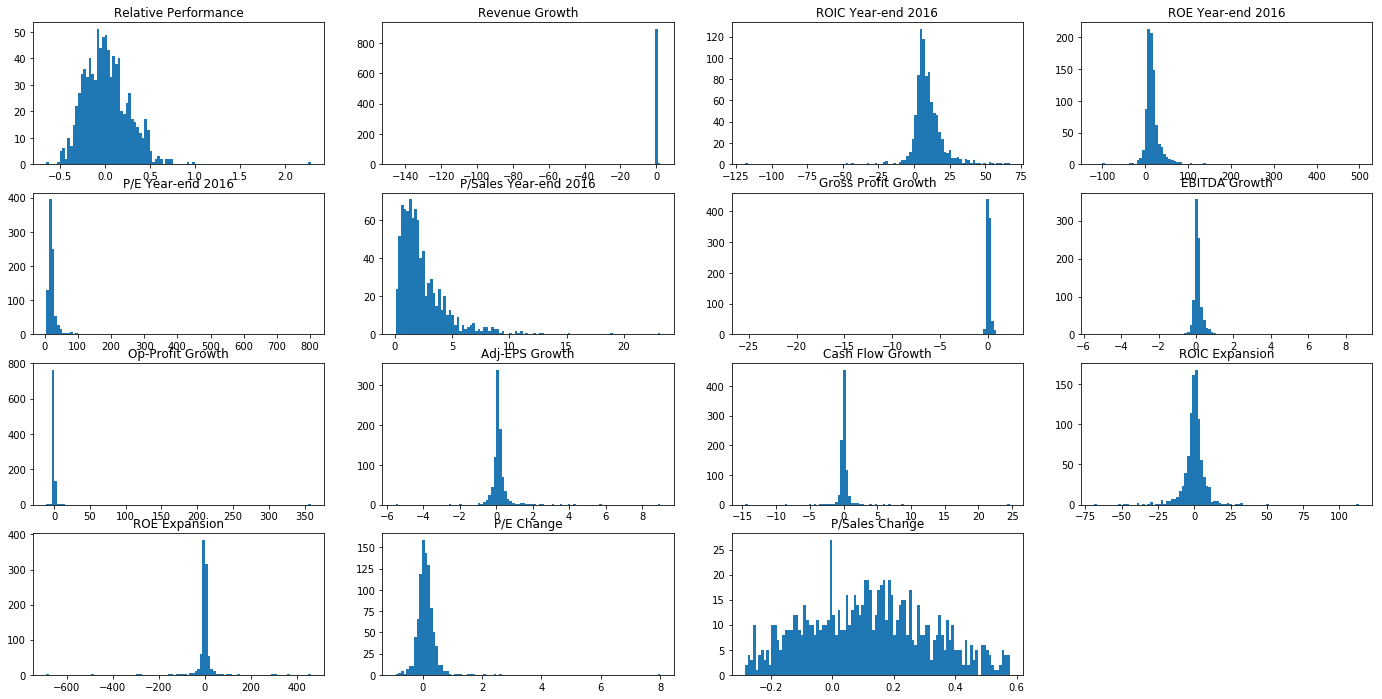

In [21]:
#Stocks_clean.hist(column='Rel_Perf_1617', bins=100)
fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(4,4,1)
ax2 = fig.add_subplot(4,4,2)
ax3 = fig.add_subplot(4,4,3)
ax4 = fig.add_subplot(4,4,4)
ax5 = fig.add_subplot(4,4,5)
ax6 = fig.add_subplot(4,4,6)
ax7 = fig.add_subplot(4,4,7)
ax8 = fig.add_subplot(4,4,8)
ax9 = fig.add_subplot(4,4,9)
ax10 = fig.add_subplot(4,4,10)
ax11 = fig.add_subplot(4,4,11)
ax12 = fig.add_subplot(4,4,12)
ax13 = fig.add_subplot(4,4,13)
ax14 = fig.add_subplot(4,4,14)
ax15 = fig.add_subplot(4,4,15)
ax1.hist(Stocks_clean.Rel_Perf_1617, bins=100), ax1.set_title('Relative Performance')
ax2.hist(Stocks_clean.Rev_1617, bins=100), ax2.set_title('Revenue Growth')
ax3.hist(Stocks_clean.ROIC_16, bins=100), ax3.set_title('ROIC Year-end 2016')
ax4.hist(Stocks_clean.ROE_16, bins=100), ax4.set_title('ROE Year-end 2016')
ax5.hist(Stocks_clean.PE_16, bins=100), ax5.set_title('P/E Year-end 2016')
ax6.hist(Stocks_clean.PS_16, bins=100), ax6.set_title('P/Sales Year-end 2016')
ax7.hist(Stocks_clean.GP_1617, bins=100), ax7.set_title('Gross Profit Growth')
ax8.hist(Stocks_clean.EBITDA_1617, bins=100), ax8.set_title('EBITDA Growth')
ax9.hist(Stocks_clean.OP_1617, bins=100), ax9.set_title('Op-Profit Growth')
ax10.hist(Stocks_clean.aEPS_1617, bins=100), ax10.set_title('Adj-EPS Growth')
ax11.hist(Stocks_clean.CFO_1617, bins=100), ax11.set_title('Cash Flow Growth')
ax12.hist(Stocks_clean.ROIX_1617, bins=100), ax12.set_title('ROIC Expansion')
ax13.hist(Stocks_clean.ROEX_1617, bins=100), ax13.set_title('ROE Expansion')
ax14.hist(Stocks_clean.PEX_1617, bins=100), ax14.set_title('P/E Change')
ax15.hist(Stocks_clean.PSX_1617, bins=100), ax15.set_title('P/Sales Change');

#### Our final step prior to fitting our linear regression model is to create and examine a correlation matrix containing our potential independent variables and our target variable.  Such a correlation matrix will inform us of at least two important items:
- Features with the highest correlations with our target => these features will be considered for use in our model
- Correlations between our independent variables (autocorrelations/collinearity).  High correlation between our independent variables is not desireable; adding autocorrelated features to our model adds no value 

In [22]:
Stocks_clean.describe()

,Px_1516,Px_1617,Rel_Perf_1617,ROIC_16,ROE_16,PE_16,PS_16,Rev_1617,GP_1617,EBITDA_1617,...,aEPS_1617,CFO_1617,ROIX_1516,ROIX_1617,ROEX_1516,ROEX_1617,PEX_1516,PEX_1617,PSX_1516,PSX_1617
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,...,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,0.175022,0.210665,0.016465,9.545510,19.392284,24.318426,2.487749,-0.049749,0.064423,0.125617,...,0.155610,0.097186,0.257306,-0.140510,2.086120,0.143936,0.187416,0.114991,0.128402,0.118277
std,0.312710,0.249808,0.249808,10.962252,35.381360,33.482642,2.261896,4.847380,0.963642,0.470204,...,0.576191,1.243858,9.652585,8.871353,52.367275,44.478031,1.134685,0.390979,0.356042,0.197040
min,-0.690131,-0.458006,-0.652206,-118.690000,-118.690000,5.130000,0.080000,-145.363636,-25.384615,-5.432361,...,-5.515152,-14.594006,-92.820000,-68.850000,-288.080000,-687.950000,-0.956160,-0.912202,-0.729196,-0.283422
25%,0.004093,0.030928,-0.163272,4.387500,8.245000,15.620000,1.052500,0.031868,0.015625,-0.000858,...,0.010381,-0.135240,-2.117500,-2.717500,-3.025000,-3.910000,-0.097066,-0.045889,-0.063506,-0.027399
50%,0.146409,0.189241,-0.004958,7.775000,13.450000,19.750000,1.855000,0.072533,0.069591,0.076343,...,0.103586,0.035799,0.020000,0.360000,0.320000,0.480000,0.066785,0.081607,0.101367,0.116707
75%,0.308908,0.351582,0.157382,13.380000,22.047500,24.480000,3.180000,0.142909,0.156167,0.178164,...,0.212537,0.229577,1.825000,3.045000,3.737500,5.217500,0.240383,0.229719,0.271764,0.250886
max,5.217617,2.478534,2.284335,67.090000,499.050000,802.790000,23.190000,2.228079,2.284806,8.720000,...,9.000000,24.625000,158.230000,113.560000,1415.150000,460.250000,26.758990,8.004318,5.166667,0.576923


In [23]:
Stocks_corr = Stocks_clean.corr()
Stocks_corr

,Px_1516,Px_1617,Rel_Perf_1617,ROIC_16,ROE_16,PE_16,PS_16,Rev_1617,GP_1617,EBITDA_1617,...,aEPS_1617,CFO_1617,ROIX_1516,ROIX_1617,ROEX_1516,ROEX_1617,PEX_1516,PEX_1617,PSX_1516,PSX_1617
Px_1516,1.000000,0.023958,0.023958,0.040945,0.009482,0.047091,-0.007512,0.020785,0.039274,0.095561,...,0.161164,0.003531,0.209501,0.094219,0.050892,0.042599,0.138726,-0.135195,0.828179,-0.047979
Px_1617,0.023958,1.000000,1.000000,0.034869,-0.029587,0.025735,0.110587,0.022443,0.083371,0.193953,...,0.229468,0.198404,0.003873,0.123369,0.013153,0.040653,-0.038426,0.211101,-0.033058,0.811279
Rel_Perf_1617,0.023958,1.000000,1.000000,0.034869,-0.029587,0.025735,0.110587,0.022443,0.083371,0.193953,...,0.229468,0.198404,0.003873,0.123369,0.013153,0.040653,-0.038426,0.211101,-0.033058,0.811279
ROIC_16,0.040945,0.034869,0.034869,1.000000,0.560303,-0.139065,0.084448,0.016367,0.030070,-0.016989,...,-0.059383,-0.011283,0.071068,-0.564947,0.043334,-0.146337,-0.090874,0.013907,-0.010874,-0.005666
ROE_16,0.009482,-0.029587,-0.029587,0.560303,1.000000,-0.089124,0.014965,0.009590,0.010184,-0.025129,...,-0.044374,-0.011563,0.100473,-0.291337,0.126316,0.001235,-0.063944,-0.013761,-0.001560,-0.028323
PE_16,0.047091,0.025735,0.025735,-0.139065,-0.089124,1.000000,0.192665,0.020194,-0.073564,0.036574,...,0.501423,0.019270,-0.030552,0.081853,-0.032010,0.034800,0.732259,-0.130626,0.049545,-0.039567
PS_16,-0.007512,0.110587,0.110587,0.084448,0.014965,0.192665,1.000000,-0.028347,-0.056345,0.062054,...,0.047379,0.039890,-0.064495,-0.025668,-0.052872,-0.016382,-0.035627,0.013054,-0.076576,0.041171
Rev_1617,0.020785,0.022443,0.022443,0.016367,0.009590,0.020194,-0.028347,1.000000,0.884160,-0.005681,...,0.015063,0.010532,-0.010809,-0.004382,-0.003319,-0.000588,0.004815,0.004486,-0.002697,-0.009181
GP_1617,0.039274,0.083371,0.083371,0.030070,0.010184,-0.073564,-0.056345,0.884160,1.000000,0.103390,...,0.022100,0.041109,-0.001313,-0.002139,-0.001182,0.002647,-0.003606,-0.005911,-0.011021,0.031593
EBITDA_1617,0.095561,0.193953,0.193953,-0.016989,-0.025129,0.036574,0.062054,-0.005681,0.103390,1.000000,...,0.105826,0.157786,-0.060220,0.217174,-0.016883,0.061684,0.063549,-0.281347,0.065993,0.057220


#### The correlation matrix, above, tells us several things:
- The features with the highest correlation to Px_1617 are EBITDA_1617 (0.206), aEPS (0.254), CFO_1617 (0.169), PEX_1617 (0.299), and PSX_1617 (0.852);
- The features with the highest correlation to Rel_Perf_1617 are EBITDA_1617 (0.206), aEPS (0.254), CFO_1617 (0.169), PEX_1617 (0.299), and PSX_1617 (0.852); 
- The highest correlation between these five features (autocorrelation/collinearity) exists between PEX_1617 and PSX_1617 (0.406).  This is an encouraging result in that we can be comfortable using all five in our model. 

### We will now begin our linear regression model fitting.
- First, we split the data into training and test sets via "train-test-split".
- Then will fit our linear regression models with the training set and evaluate our models' performance.

#### This first model iteration examines stock performance considering current-year data variables (i.e., 2016-17 stock returns and 2016-17 financial data)

In [24]:
# Instantiate and fit linear regression model
lr = LinearRegression()
X = Stocks_clean[['EBITDA_1617', 'aEPS_1617', 'CFO_1617', 'PEX_1617', 'PSX_1617']]
y = Stocks_clean.Px_1617

# # Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# Predict stock performance on test data
Stocks_predict = lr.predict(X_test)

In [27]:
# Calculate regression model score ("R^2")
score = lr.score(X_train, y_train)

In [28]:
# evaluate performance based on the root-mean-squared-error (= sq-rt of men-squared-error)
rmse = np.sqrt(mean_squared_error(y_test, Stocks_predict))

In [29]:
print('R-squared score: {}'.format(score), '\nRMSE: {:.4f}'.format(rmse))

R-squared score: 0.7581663313054727 
RMSE: 0.1508


### An Interesting Test => our LR Model Predicting Stock Performance vs "The Little Book That Beat the Market" 
- The basic premise of Joel Greenblatt's book, "The Little Book That Beat the Market", says that in order to beat the market, investors should buy stocks with high ROE's and low-P/E's.
- We will test this premise versus our model! 

In [30]:
# Instantiate and fit linear regression model
lr = LinearRegression()
X = Stocks_clean[['ROE_16', 'PE_16']]
y = Stocks_clean.Px_1617

# # Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [31]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
# Predict stock performance on test data
Stocks_predict = lr.predict(X_test)

In [33]:
# Calculate regression model score ("R^2")
score = lr.score(X_train, y_train)

In [34]:
# evaluate performance based on the root-mean-squared-error (= sq-rt of men-squared-error)
rmse = np.sqrt(mean_squared_error(y_test, Stocks_predict))

In [35]:
print('R-squared score: {}'.format(score), '\nRMSE: {:.4f}'.format(rmse))

R-squared score: 0.0021464343521964135 
RMSE: 0.2792


### So far, we have examined stocks' 2016-2017 performance based on companies' 2016-2017 financial performance.  However, the market is a "forward looking and discounting" mechanism.  Therefore, we will examine stocks' 2015-16 performance based on companies' 2016-2017 financial results.  NOTE: this exercise is a recent analytical hypothesis.  Appropriate independent variables for such an assessment would be forward FORECASTS, not actual financial results.  Our "forward-looking" data are actual results.  Therefore, a key assumption here is that the companies' 2016-2017 actual growth rates are close approximations of what these features' forecasts would have been at year-end 2016. 
- We will conduct a similar analysis.  However, we will use the forward looking financial performance as predictor features.

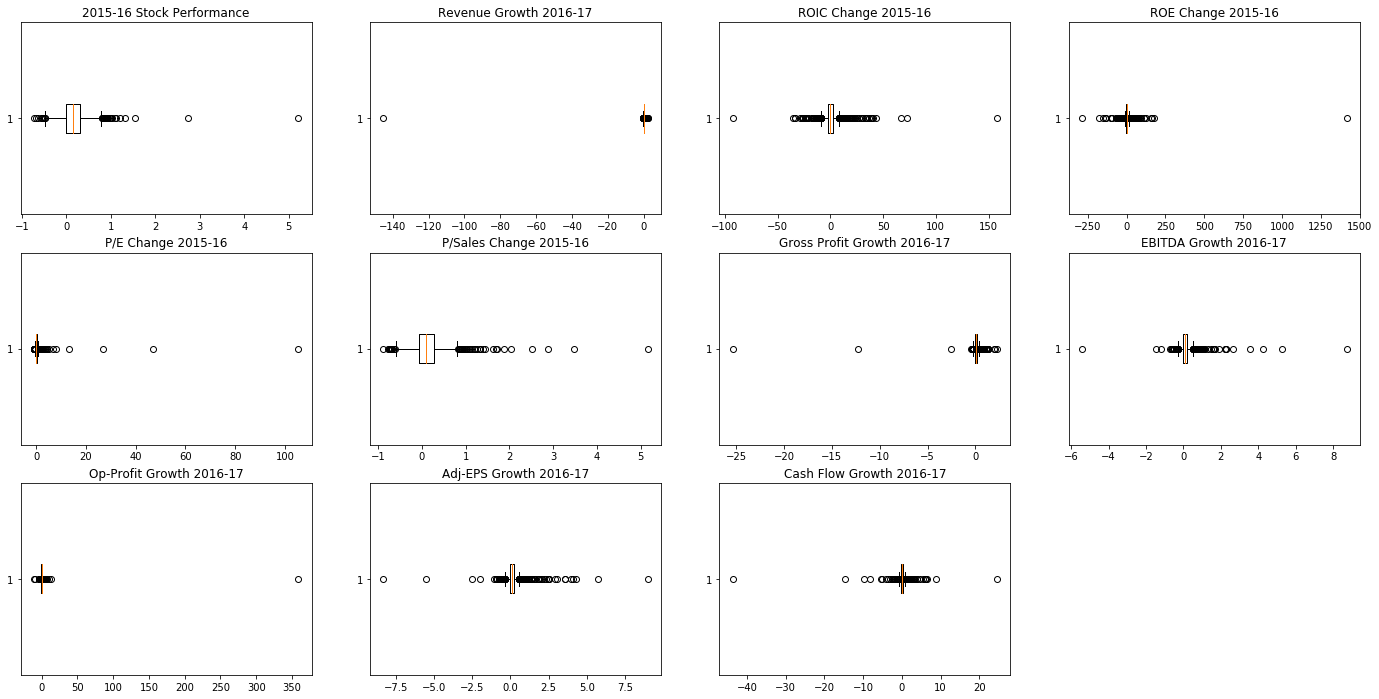

In [36]:
fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(3,4,1)
ax2 = fig.add_subplot(3,4,2)
ax3 = fig.add_subplot(3,4,3)
ax4 = fig.add_subplot(3,4,4)
ax5 = fig.add_subplot(3,4,5)
ax6 = fig.add_subplot(3,4,6)
ax7 = fig.add_subplot(3,4,7)
ax8 = fig.add_subplot(3,4,8)
ax9 = fig.add_subplot(3,4,9)
ax10 = fig.add_subplot(3,4,10)
ax11 = fig.add_subplot(3,4,11)
ax1.boxplot(Stocks_1617.Px_1516, vert=False), ax1.set_title('2015-16 Stock Performance')
ax2.boxplot(Stocks_1617.Rev_1617, vert=False), ax2.set_title('Revenue Growth 2016-17')
ax3.boxplot(Stocks_1617.ROIX_1516, vert=False), ax3.set_title('ROIC Change 2015-16')
ax4.boxplot(Stocks_1617.ROEX_1516, vert=False), ax4.set_title('ROE Change 2015-16')
ax5.boxplot(Stocks_1617.PEX_1516, vert=False), ax5.set_title('P/E Change 2015-16')
ax6.boxplot(Stocks_1617.PSX_1516, vert=False), ax6.set_title('P/Sales Change 2015-16')
ax7.boxplot(Stocks_1617.GP_1617, vert=False), ax7.set_title('Gross Profit Growth 2016-17')
ax8.boxplot(Stocks_1617.EBITDA_1617, vert=False), ax8.set_title('EBITDA Growth 2016-17')
ax9.boxplot(Stocks_1617.OP_1617, vert=False), ax9.set_title('Op-Profit Growth 2016-17')
ax10.boxplot(Stocks_1617.aEPS_1617, vert=False), ax10.set_title('Adj-EPS Growth 2016-17')
ax11.boxplot(Stocks_1617.CFO_1617, vert=False), ax11.set_title('Cash Flow Growth 2016-17');

In [37]:
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.Px_1516-Stocks_1617.Px_1516.mean())<=(1*Stocks_1617.Px_1516.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.Rev_1617-Stocks_1617.Rev_1617.mean())<=(1*Stocks_1617.Rev_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.ROIX_1516-Stocks_1617.ROIX_1516.mean())<=(1*Stocks_1617.ROIX_1516.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.ROEX_1516-Stocks_1617.ROEX_1516.mean())<=(1*Stocks_1617.ROEX_1516.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.PEX_1516-Stocks_1617.PEX_1516.mean())<=(1*Stocks_1617.PEX_1516.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.PSX_1516-Stocks_1617.PSX_1516.mean())<=(1*Stocks_1617.PSX_1516.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.GP_1617-Stocks_1617.GP_1617.mean())<=(1*Stocks_1617.GP_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.EBITDA_1617-Stocks_1617.EBITDA_1617.mean())<=(1*Stocks_1617.EBITDA_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.OP_1617-Stocks_1617.OP_1617.mean())<=(1*Stocks_1617.OP_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.aEPS_1617-Stocks_1617.aEPS_1617.mean())<=(1*Stocks_1617.aEPS_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.CFO_1617-Stocks_1617.CFO_1617.mean())<=(1*Stocks_1617.CFO_1617.std())];

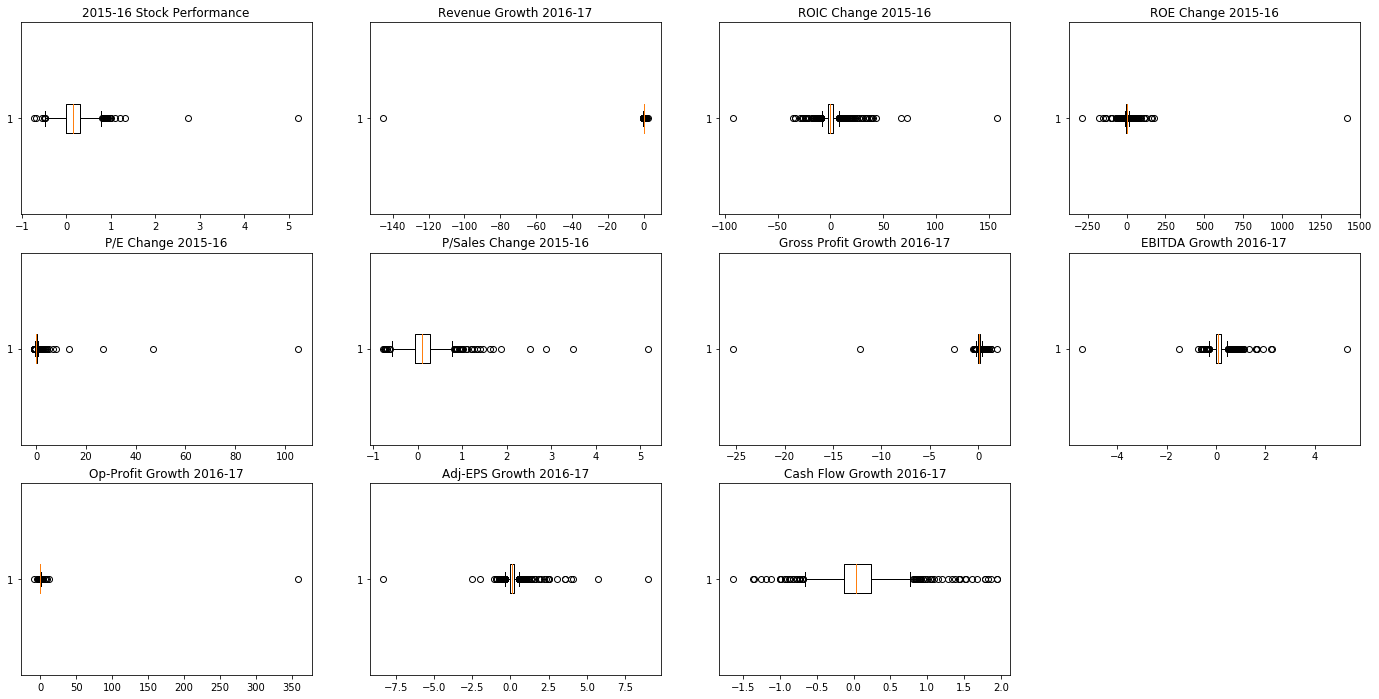

In [38]:
fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(3,4,1)
ax2 = fig.add_subplot(3,4,2)
ax3 = fig.add_subplot(3,4,3)
ax4 = fig.add_subplot(3,4,4)
ax5 = fig.add_subplot(3,4,5)
ax6 = fig.add_subplot(3,4,6)
ax7 = fig.add_subplot(3,4,7)
ax8 = fig.add_subplot(3,4,8)
ax9 = fig.add_subplot(3,4,9)
ax10 = fig.add_subplot(3,4,10)
ax11 = fig.add_subplot(3,4,11)
ax1.boxplot(Stocks_clean.Px_1516, vert=False), ax1.set_title('2015-16 Stock Performance')
ax2.boxplot(Stocks_clean.Rev_1617, vert=False), ax2.set_title('Revenue Growth 2016-17')
ax3.boxplot(Stocks_clean.ROIX_1516, vert=False), ax3.set_title('ROIC Change 2015-16')
ax4.boxplot(Stocks_clean.ROEX_1516, vert=False), ax4.set_title('ROE Change 2015-16')
ax5.boxplot(Stocks_clean.PEX_1516, vert=False), ax5.set_title('P/E Change 2015-16')
ax6.boxplot(Stocks_clean.PSX_1516, vert=False), ax6.set_title('P/Sales Change 2015-16')
ax7.boxplot(Stocks_clean.GP_1617, vert=False), ax7.set_title('Gross Profit Growth 2016-17')
ax8.boxplot(Stocks_clean.EBITDA_1617, vert=False), ax8.set_title('EBITDA Growth 2016-17')
ax9.boxplot(Stocks_clean.OP_1617, vert=False), ax9.set_title('Op-Profit Growth 2016-17')
ax10.boxplot(Stocks_clean.aEPS_1617, vert=False), ax10.set_title('Adj-EPS Growth 2016-17')
ax11.boxplot(Stocks_clean.CFO_1617, vert=False), ax11.set_title('Cash Flow Growth 2016-17');

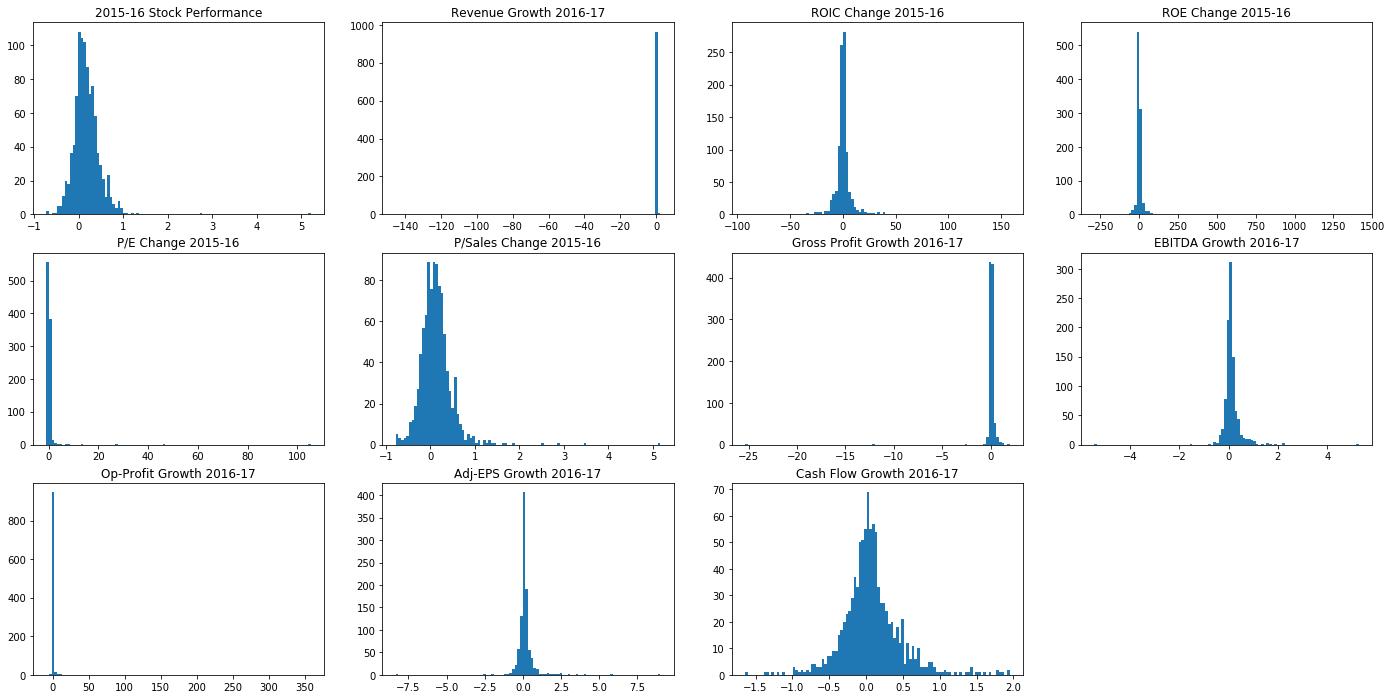

In [39]:
#Stocks_clean.hist(column='Rel_Perf_1617', bins=100)
fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(3,4,1)
ax2 = fig.add_subplot(3,4,2)
ax3 = fig.add_subplot(3,4,3)
ax4 = fig.add_subplot(3,4,4)
ax5 = fig.add_subplot(3,4,5)
ax6 = fig.add_subplot(3,4,6)
ax7 = fig.add_subplot(3,4,7)
ax8 = fig.add_subplot(3,4,8)
ax9 = fig.add_subplot(3,4,9)
ax10 = fig.add_subplot(3,4,10)
ax11 = fig.add_subplot(3,4,11)
ax1.hist(Stocks_clean.Px_1516, bins=100), ax1.set_title('2015-16 Stock Performance')
ax2.hist(Stocks_clean.Rev_1617, bins=100), ax2.set_title('Revenue Growth 2016-17')
ax3.hist(Stocks_clean.ROIX_1516, bins=100), ax3.set_title('ROIC Change 2015-16')
ax4.hist(Stocks_clean.ROEX_1516, bins=100), ax4.set_title('ROE Change 2015-16')
ax5.hist(Stocks_clean.PEX_1516, bins=100), ax5.set_title('P/E Change 2015-16')
ax6.hist(Stocks_clean.PSX_1516, bins=100), ax6.set_title('P/Sales Change 2015-16')
ax7.hist(Stocks_clean.GP_1617, bins=100), ax7.set_title('Gross Profit Growth 2016-17')
ax8.hist(Stocks_clean.EBITDA_1617, bins=100), ax8.set_title('EBITDA Growth 2016-17')
ax9.hist(Stocks_clean.OP_1617, bins=100), ax9.set_title('Op-Profit Growth 2016-17')
ax10.hist(Stocks_clean.aEPS_1617, bins=100), ax10.set_title('Adj-EPS Growth 2016-17')
ax11.hist(Stocks_clean.CFO_1617, bins=100), ax11.set_title('Cash Flow Growth 2016-17');

In [40]:
Stocks_corr = Stocks_clean.corr()
Stocks_corr

,Px_1516,Px_1617,Rel_Perf_1617,ROIC_16,ROE_16,PE_16,PS_16,Rev_1617,GP_1617,EBITDA_1617,...,aEPS_1617,CFO_1617,ROIX_1516,ROIX_1617,ROEX_1516,ROEX_1617,PEX_1516,PEX_1617,PSX_1516,PSX_1617
Px_1516,1.000000,0.043471,0.043471,0.052749,-0.003195,0.050572,0.038381,0.019314,0.043913,0.084828,...,0.116846,0.064992,0.245608,0.106544,0.059231,0.036888,0.093606,-0.134186,0.800267,-0.045023
Px_1617,0.043471,1.000000,1.000000,0.080043,0.048223,-0.065904,0.112698,0.018431,0.074305,0.242446,...,0.242151,0.268237,0.000071,0.094917,0.038294,0.079226,-0.094977,0.330874,-0.055245,0.706931
Rel_Perf_1617,0.043471,1.000000,1.000000,0.080043,0.048223,-0.065904,0.112698,0.018431,0.074305,0.242446,...,0.242151,0.268237,0.000071,0.094917,0.038294,0.079226,-0.094977,0.330874,-0.055245,0.706931
ROIC_16,0.052749,0.080043,0.080043,1.000000,0.603039,-0.179798,0.071291,0.014150,0.018427,-0.049269,...,-0.010760,-0.065450,-0.002729,-0.544822,0.052461,-0.038801,-0.191384,0.035053,-0.061497,0.012434
ROE_16,-0.003195,0.048223,0.048223,0.603039,1.000000,-0.179445,-0.008055,0.006376,-0.011056,-0.065928,...,0.018333,-0.053292,0.002076,-0.337184,0.137870,0.024673,-0.197748,0.030377,-0.078625,0.040756
PE_16,0.050572,-0.065904,-0.065904,-0.179798,-0.179445,1.000000,0.053642,0.008083,0.012949,0.089257,...,-0.279673,0.107760,0.067650,0.220115,-0.029925,0.104056,0.919094,-0.122407,0.145608,-0.083099
PS_16,0.038381,0.112698,0.112698,0.071291,-0.008055,0.053642,1.000000,-0.021637,-0.020263,0.142328,...,0.059137,0.166204,-0.003867,-0.001502,-0.039062,-0.016270,-0.018045,-0.010979,0.017632,-0.027457
Rev_1617,0.019314,0.018431,0.018431,0.014150,0.006376,0.008083,-0.021637,1.000000,0.879929,-0.011797,...,0.010337,0.022224,-0.007156,-0.002223,-0.002958,0.001167,0.004016,0.005034,-0.000432,-0.002756
GP_1617,0.043913,0.074305,0.074305,0.018427,-0.011056,0.012949,-0.020263,0.879929,1.000000,0.051341,...,0.035506,0.072698,0.035527,0.015639,0.003727,0.023701,0.035145,-0.015177,0.016631,0.026066
EBITDA_1617,0.084828,0.242446,0.242446,-0.049269,-0.065928,0.089257,0.142328,-0.011797,0.051341,1.000000,...,0.317210,0.267884,0.022229,0.245201,-0.005047,0.121202,0.083046,-0.257538,0.055554,0.197060


#### The correlation matrix, above, tells us several things:
- The features with the highest correlation to Px_1516 are PSX_1516 (0.800), ROIX_1516 (0.246), aEPS_1617 (0.117), PEX_1516 (0.093), and EBITDA_1617 (0.085);
- The highest correlation between these five features (autocorrelation/collinearity) exists between PSX_1516 and ROIX_1516 (0.207).  This is an encouraging result in that we can be comfortable using all five in our model. 

In [41]:
# Instantiate and fit linear regression model
lr = LinearRegression()
X = Stocks_clean[['PSX_1516', 'ROIX_1516', 'aEPS_1617', 'PEX_1516', 'EBITDA_1617']]
y = Stocks_clean.Px_1516

# # Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [42]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
# Predict stock performance on test data
Stocks_predict = lr.predict(X_test)

In [44]:
# Calculate regression model score ("R^2")
score = lr.score(X_train, y_train)

In [45]:
# evaluate performance based on the root-mean-squared-error (= sq-rt of men-squared-error)
rmse = np.sqrt(mean_squared_error(y_test, Stocks_predict))

In [46]:
print('R-squared score: {}'.format(score), '\nRMSE: {:.4f}'.format(rmse))

R-squared score: 0.7671505966689346 
RMSE: 0.2946


#### Next Steps for Our Analysis and Data Science Education
- Examine predictive performance by fitting several other regression models (logistic regression, RIdge/Lasso/Elastic net Decision Trees, Time Series)
- Cross validation (same as train-test-split (trains on 80%, tests on remaining 30%), but executes more folds; i.e., cv=5 => 5x train-test-splts) 
- Polynomial features
- Preprocessing (Scaler)